In [109]:
import pandas as pd
from prophet import Prophet

Install necessary packages, namely pandas and prophet if you do not have already

In [ ]:
df = pd.read_csv('GNPDataset.csv', on_bad_lines='skip')

Data is good, but need to drop last two columns and then reformat csv with date in one column and the visitor number in the second column to feed prophet properly

In [ ]:
#taken and modified from https://github.com/fred-lindsey/projects/blob/main/TSA_NPS_visitor_prediction/wrangle.py

# set 'Year' as the index, so that I can stack the dataframe, ie reduce the dimensions so that I can merge the dataframes
df = df.set_index('Year')
# drop 'Textbox4' and 'AnnualTotal' column. This is a yearly % change and yearly total column for the dataset
df = df.drop(columns=['Textbox4','AnnualTotal'])
# now I'm going to stack, meaning move the columns headers under the index, to reduce the dimensionality of the dataframe
df = df.stack(level=0)
# stacking produces a series when I'm done, and it will need to be converted back into a DF
df = df.to_frame()
# now add a title to the DF's only column
df.columns = ['glacier_national_park_visits']
# reset the index to seperate the current multi-index into distinct year and month columns
df = df.reset_index(drop=False)
# create a composite date column
df['date'] = df.Year.astype(str) + "-" + df.level_1
# convert the date column to datetime object
df.date = pd.to_datetime(df.date)
# set the date as the index and sort index
df = df.set_index('date').sort_index()
# drop Year and level_1 columns that are no longer needed
df = df.drop(columns=['Year', 'level_1'])
display(df)

In [ ]:
df.to_csv(r'C:\Users\divergence\OneDrive - DIVERGENCE ONE\Documents\GitHub\2022-07-DSI-WDX\douglas481\ML and Python Capstone\IndexedData.csv', index=True)

In [110]:
df = pd.read_csv('IndexedData.csv')

In [111]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].str.replace(r',', '')
df['y'] = pd.to_numeric(df['y'])
display(df)

,ds,y
0,1979-01-01,6357
1,1979-02-01,3480
2,1979-03-01,11790
3,1979-04-01,15000
4,1979-05-01,65923
...,...,...
511,2021-08-01,670628
512,2021-09-01,533388
513,2021-10-01,149564
514,2021-11-01,26300


Data has been cleaned and formatted to be fed to Prophet, so next we have to train the model

In [113]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

10:15:42 - cmdstanpy - INFO - Chain [1] start processing
10:15:42 - cmdstanpy - INFO - Chain [1] done processing


Model has been trained, next we have to predict the future

In [114]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,33251.600344,-128686.277900,97288.679932,33251.600344,33251.600344,-52168.526563,-52168.526563,-52168.526563,107638.770186,107638.770186,107638.770186,-159807.296749,-159807.296749,-159807.296749,0.0,0.0,0.0,-18916.926218
1,1979-02-01,33359.146820,-126350.708167,90101.230638,33359.146820,33359.146820,-51789.486889,-51789.486889,-51789.486889,107638.770186,107638.770186,107638.770186,-159428.257075,-159428.257075,-159428.257075,0.0,0.0,0.0,-18430.340069
2,1979-03-01,33456.285572,-127891.895207,92981.602506,33456.285572,33456.285572,-49659.686794,-49659.686794,-49659.686794,107638.770186,107638.770186,107638.770186,-157298.456980,-157298.456980,-157298.456980,0.0,0.0,0.0,-16203.401222
3,1979-04-01,33563.832048,-115075.387622,101955.998509,33563.832048,33563.832048,-38979.296788,-38979.296788,-38979.296788,107638.770186,107638.770186,107638.770186,-146618.066974,-146618.066974,-146618.066974,0.0,0.0,0.0,-5415.464740
4,1979-05-01,33667.909282,-41378.259994,175795.220281,33667.909282,33667.909282,39795.134799,39795.134799,39795.134799,107638.770186,107638.770186,107638.770186,-67843.635387,-67843.635387,-67843.635387,0.0,0.0,0.0,73463.044081


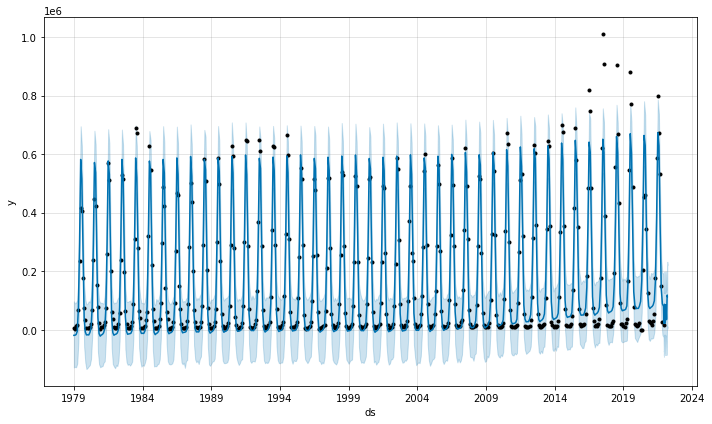

In [115]:
plot1 = m.plot(forecast)

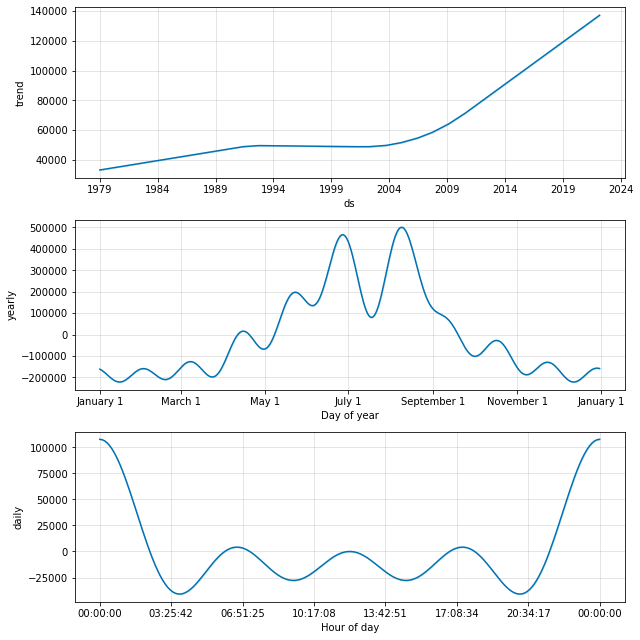

In [116]:
plt2 = m.plot_components(forecast)